# Random Forest Regression

Random Forest applied to regressions trees.

Random forest is a version of [Ensemble Learning](https://blog.statsbot.co/ensemble-learning-d1dcd548e936)like Gradient Boosting for exemple.
Ensemble learning is when you take multiple algotrithms or the same algorithm multiple times and you put them together to make something much powerful.

How to build one ?

- Step 1: Pick a random K data points from the Training Set

- Step 2: Build the Decision tree associated to these K data points 

- Step 3: Choose the number of Ntree of trees you want to build and __repeat step 1 & 2__. So you are going to build many trees

- Step 4: Use all of them to predict so for a new data, make each one of your Ntree trees predict the value of Y for the data point in question and assign new data point the average across all of the predicted Y values. Instead of having one prediction you are going to have many predictions and make the average accross all.

This method improve the accuray of your prediction because you are going to make an average of may predictions of regression decision trees.

Now let's begin with our example and import our dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Position_Salaries.csv')
print(dataset)

plt.scatter(dataset['Level'], dataset['Salary'])
plt.show() 

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [2]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

We are going to use the [Random Forest Regressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) from the sklearn ensemble class (n_estimators is the number of trees)

In [12]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

Salary prediction: 167000.0


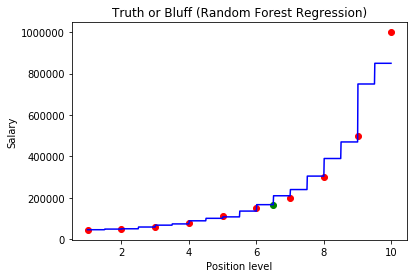

In [17]:
# Predicting a new result
y_pred = regressor.predict(6.5)

print( "Salary prediction: " + str(y_pred[0]))

# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.scatter(6.5, y_pred, color = 'green')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

By having several Decisions trees instead of one we get more steps in the stairs.

The prediction of the salary of a person with 6.5 years of experience is the average of 10 decision trees predictions.

Be careful if we add more trees in our random forest it doesn't mean we are going to get more steps in the stairs.

Let's make the tests with more trees !

Salary prediction: 158300.0


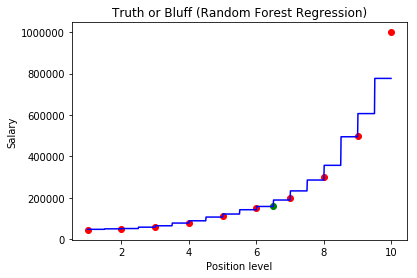

In [20]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X, y)

# Predicting a new result
y_pred = regressor.predict(6.5)
print( "Salary prediction: " + str(y_pred[0]))

# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.scatter(6.5, y_pred, color = 'green')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

The prediction is more accurate now. The model is more even accurate with 300 trees 

Salary prediction: 160333.333333


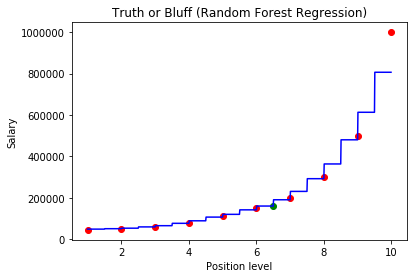

In [21]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X, y)

# Predicting a new result
y_pred = regressor.predict(6.5)
print( "Salary prediction: " + str(y_pred[0]))

# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.scatter(6.5, y_pred, color = 'green')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()